## Time Series EDA

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import yfinance as yf

In [23]:
# Get current date
current_date = datetime(2024, 12, 31)  # Using a known future date for consistency
start_date = datetime(2024, 1, 1)

# Fetch Tesla stock data using yfinance
df_tesla = yf.download('TSLA', start=start_date, end=current_date)

C:\Users\ssssa\AppData\Local\Temp\ipykernel_5940\2854902087.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_tesla = yf.download('TSLA', start=start_date, end=current_date)
[*********************100%***********************]  1 of 1 completed


In [24]:
df_tesla.tail()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-12-23,430.600006,434.510010,415.410004,431.000000,72698100
2024-12-24,462.279999,462.779999,435.140015,435.899994,59551800
2024-12-26,454.130005,465.329987,451.019989,465.160004,76366400
2024-12-27,431.660004,450.000000,426.500000,449.519989,82666800
2024-12-30,417.410004,427.000000,415.750000,419.399994,64941000


<Axes: xlabel='Date'>

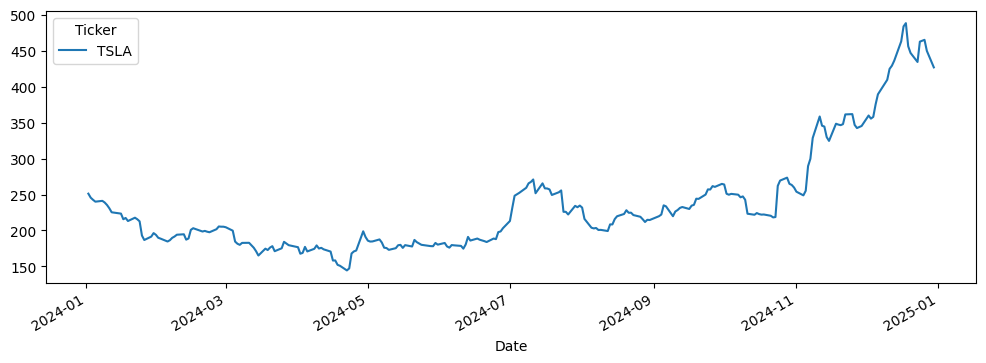

In [25]:
df_tesla['High'].plot(figsize=(12,4))

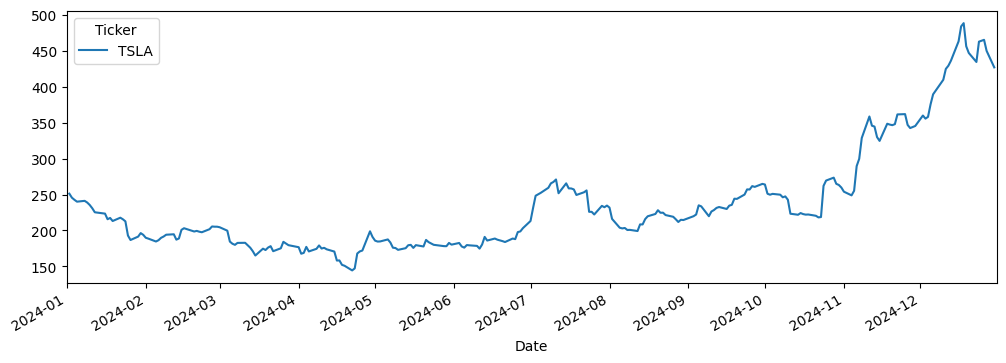

In [ ]:
## xlimit and y limit
df_tesla['High'].plot(xlim=['2024-01-01','2024-12-31'],figsize=(12,4))

<Axes: xlabel='Date'>

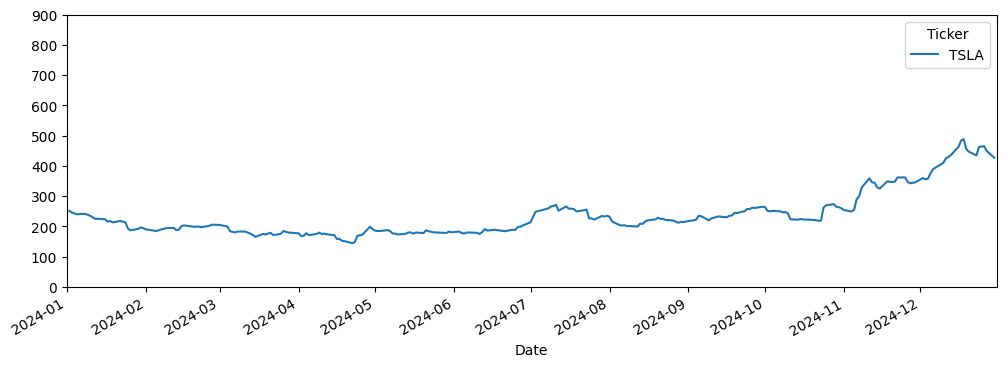

In [27]:
## xlimit and y limit
df_tesla['High'].plot(xlim=['2024-01-01','2024-12-31'],ylim=[0,900],figsize=(12,4))

<Axes: xlabel='Date'>

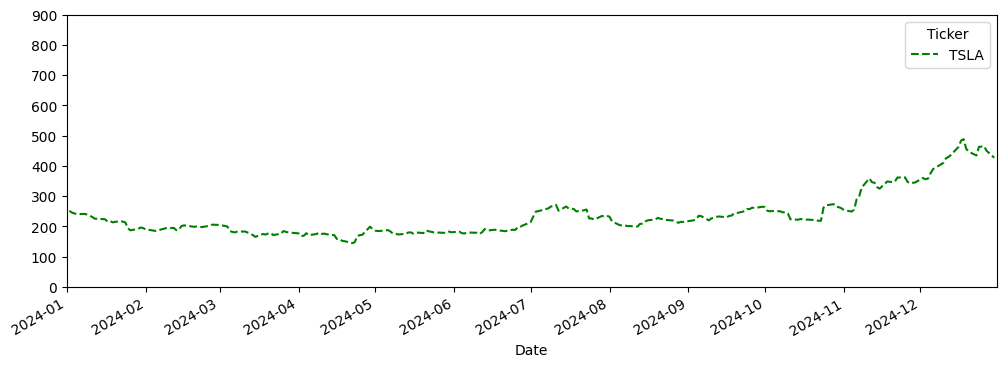

In [28]:
## xlimit and y limit and coloring
df_tesla['High'].plot(xlim=['2024-01-01','2024-12-31'],ylim=[0,900],figsize=(12,4),ls='--',c='green')

In [29]:
df_tesla.index

DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-16',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [32]:
index=df_tesla.loc['2024-01-02':'2024-12-30'].index
share_open=df_tesla.loc['2024-01-02':'2024-12-30']['Open']

In [33]:
share_open

Ticker,TSLA
Date,
2024-01-02,250.080002
2024-01-03,244.979996
2024-01-04,239.250000
2024-01-05,236.860001
2024-01-08,236.139999
...,...
2024-12-23,431.000000
2024-12-24,435.899994
2024-12-26,465.160004


In [34]:
index

DatetimeIndex(['2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05',
               '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11',
               '2024-01-12', '2024-01-16',
               ...
               '2024-12-16', '2024-12-17', '2024-12-18', '2024-12-19',
               '2024-12-20', '2024-12-23', '2024-12-24', '2024-12-26',
               '2024-12-27', '2024-12-30'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

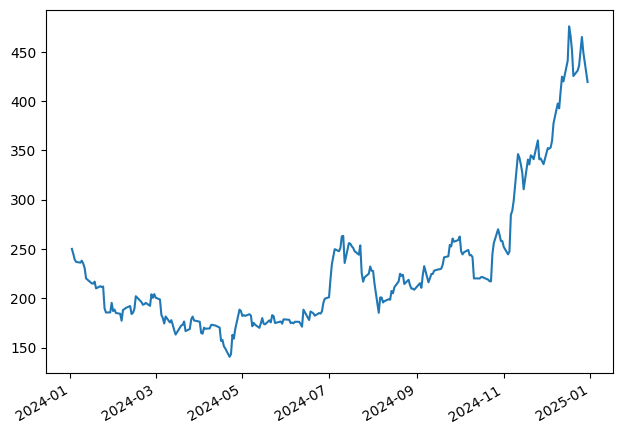

In [35]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [29]:
## Datetime Index

In [36]:
df_tesla=df_tesla.reset_index()

In [37]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        251 non-null    datetime64[ns]
 1   (Close, TSLA)   251 non-null    float64       
 2   (High, TSLA)    251 non-null    float64       
 3   (Low, TSLA)     251 non-null    float64       
 4   (Open, TSLA)    251 non-null    float64       
 5   (Volume, TSLA)  251 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.9 KB


In [38]:
df_tesla=df_tesla.set_index('Date',drop=True)

In [39]:
df_tesla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,240.119995,234.899994,236.860001,92488900
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


## Time Resampling

In [50]:
df_tesla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,240.119995,234.899994,236.860001,92488900
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


In [51]:
df_tesla.resample(rule='A').min()

C:\Users\ssssa\AppData\Local\Temp\ipykernel_5940\2338822268.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_tesla.resample(rule='A').min()


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-12-31,142.050003,144.440002,138.800003,140.559998,37167600


In [52]:
df_tesla.resample(rule='A').max()

C:\Users\ssssa\AppData\Local\Temp\ipykernel_5940\3203370108.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_tesla.resample(rule='A').max()


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-12-31,479.859985,488.540009,457.51001,475.899994,243869700


C:\Users\ssssa\AppData\Local\Temp\ipykernel_5940\3654829475.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_tesla.resample(rule='A').max()['Open'].plot()
c:\Git Projects\Time Series - Airline Passenger Prediction\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Axes: xlabel='Date'>

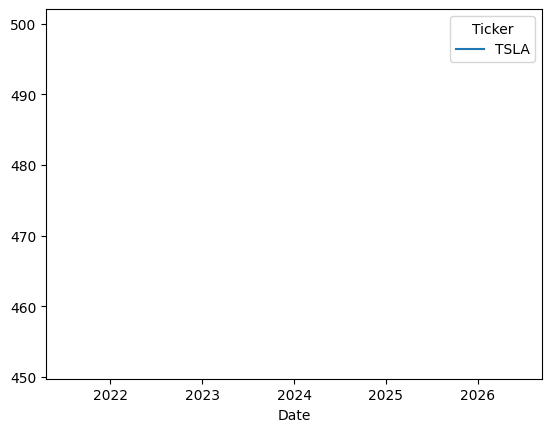

In [53]:
##year end frequency
df_tesla.resample(rule='A').max()['Open'].plot()

<Axes: xlabel='Date'>

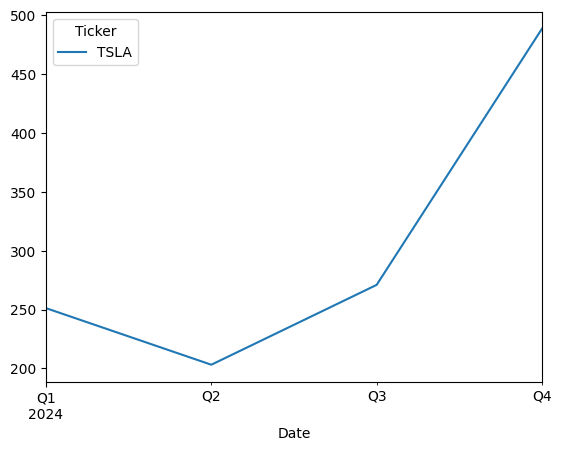

In [54]:
##quaterly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='QS').max()['High'].plot()

In [55]:
##Business End Frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='BA').max()

C:\Users\ssssa\AppData\Local\Temp\ipykernel_5940\2028374030.py:3: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  df_tesla.resample(rule='BA').max()


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-12-31,479.859985,488.540009,457.51001,475.899994,243869700


In [56]:
df_tesla.resample(rule='BQS').max()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-01-01,248.419998,251.250000,244.410004,250.080002,198076800
2024-04-01,197.880005,203.199997,195.259995,199.550003,243869700
2024-07-01,263.260010,271.000000,257.859985,263.299988,221707300
2024-10-01,479.859985,488.540009,457.510010,475.899994,210521600


C:\Users\ssssa\AppData\Local\Temp\ipykernel_5940\2438607900.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')


<Axes: xlabel='Date'>

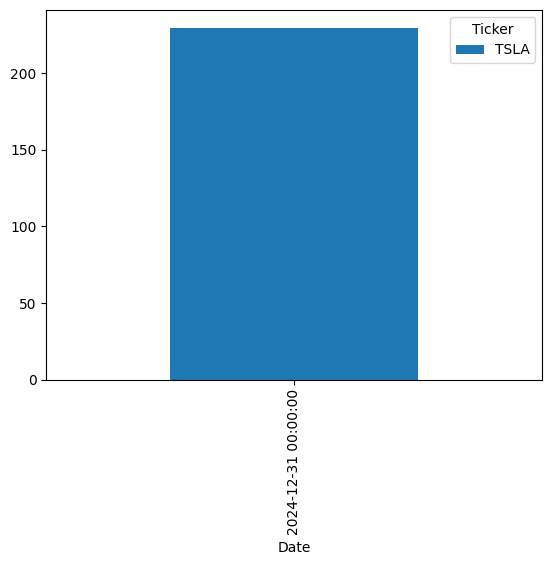

In [57]:
##plotting
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

C:\Users\ssssa\AppData\Local\Temp\ipykernel_5940\2884966702.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))


<Axes: xlabel='Date'>

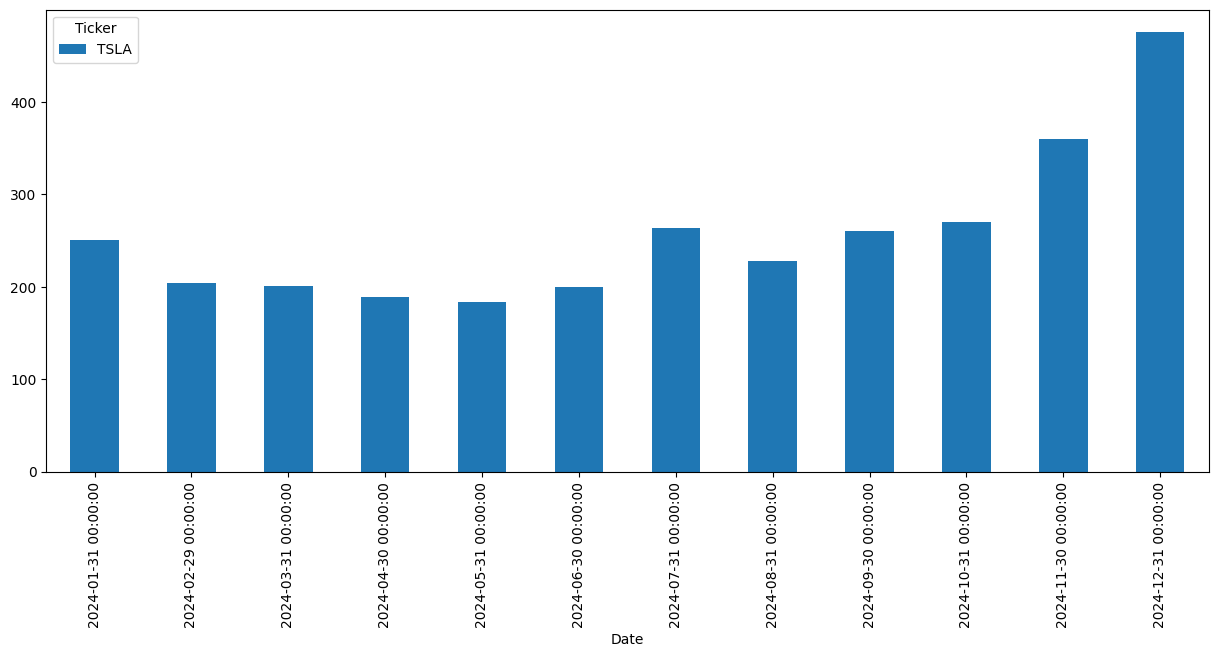

In [58]:
df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [59]:
df_tesla['High'].rolling(11).max().head(20)

Ticker,TSLA
Date,
2024-01-02,NaN
2024-01-03,NaN
2024-01-04,NaN
2024-01-05,NaN
2024-01-08,NaN
2024-01-09,NaN
2024-01-10,NaN
2024-01-11,NaN
2024-01-12,NaN


In [60]:
df_tesla.head()

Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
2024-01-05,237.490005,240.119995,234.899994,236.860001,92488900
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


In [61]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()

In [62]:
df_tesla.head(31)

Price,Close,High,Low,Open,Volume,Open:30 days rolling
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200,NaN
2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600,NaN
2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300,NaN
2024-01-05,237.490005,240.119995,234.899994,236.860001,92488900,NaN
2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600,NaN
2024-01-09,234.960007,238.960007,232.039993,238.110001,96705700,NaN
2024-01-10,233.940002,235.500000,231.289993,235.100006,91628500,NaN
2024-01-11,227.220001,230.929993,225.369995,230.570007,105873600,NaN


<Axes: xlabel='Date'>

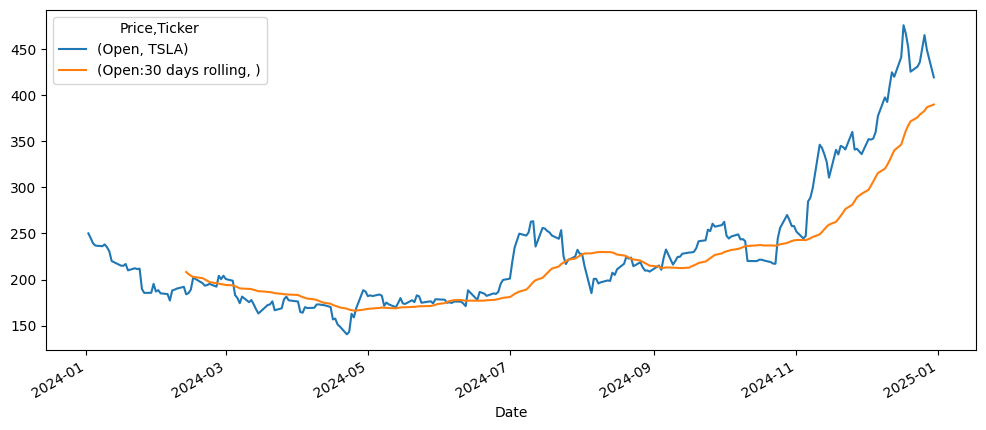

In [63]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))